In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cardiovascular.csv")
print(df.shape)
print(df.columns.tolist())
df.head()

(70000, 13)
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
avg_age = df['age'].mean() / 365
print(f"Average age: {avg_age:.1f} years")

Average age: 53.3 years


In [4]:
high_chol = df[df['cholesterol'] > 1]['cardio'].mean()
normal_chol = df[df['cholesterol'] == 1]['cardio'].mean()
print(f"High chol CVD rate: {high_chol:.2f}, Normal: {normal_chol:.2f}")

High chol CVD rate: 0.68, Normal: 0.44


In [5]:
high_gluc = df[df['gluc'] > 1]['cardio'].mean()
print(f"CVD rate with high glucose: {high_gluc:.2f}")

CVD rate with high glucose: 0.61


In [6]:
print(df.groupby('smoke')['cardio'].mean())

smoke
0    0.502107
1    0.474793
Name: cardio, dtype: float64


In [7]:
print(df.groupby('alco')['cardio'].mean())

alco
0    0.500574
1    0.484325
Name: cardio, dtype: float64


In [8]:
print(df.groupby('active')['cardio'].mean())

active
0    0.535774
1    0.490891
Name: cardio, dtype: float64


In [9]:
print(df.groupby('gender')['cardio'].mean())

gender
1    0.496727
2    0.505231
Name: cardio, dtype: float64


Text(0.5, 1.0, 'Avg Age ≈ 53.3 yrs')

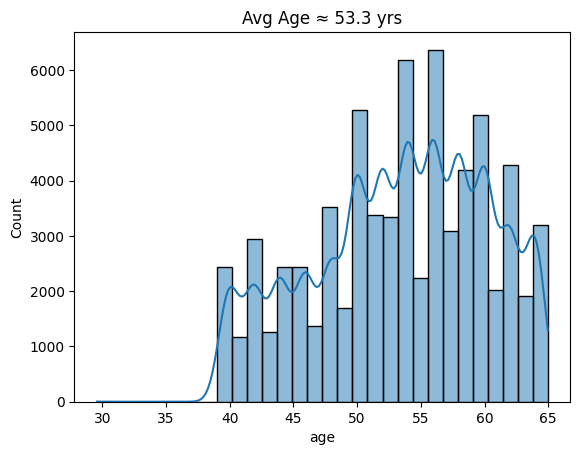

In [10]:
avg_age = df['age'].mean() / 365
sns.histplot(df['age']/365, bins=30, kde=True); plt.title(f"Avg Age ≈ {avg_age:.1f} yrs")

Text(0.5, 1.0, 'Feature Correlation with CVD')

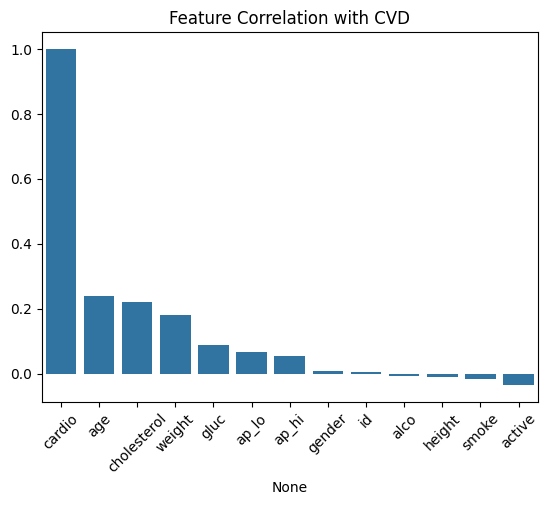

In [11]:
corr = df.corr(numeric_only=True)['cardio'].sort_values(ascending=False)
sns.barplot(x=corr.index, y=corr.values); plt.xticks(rotation=45); plt.title("Feature Correlation with CVD")

Text(0.5, 1.0, 'CVD Rate by Cholesterol Level')

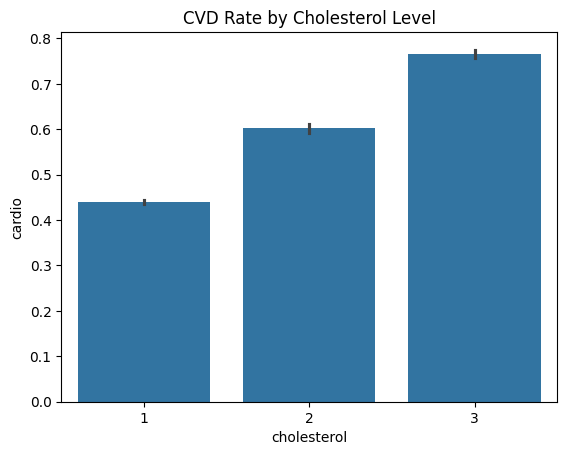

In [12]:
sns.barplot(x='cholesterol', y='cardio', data=df); plt.title("CVD Rate by Cholesterol Level")

Text(0.5, 1.0, 'CVD Rate by Glucose Level')

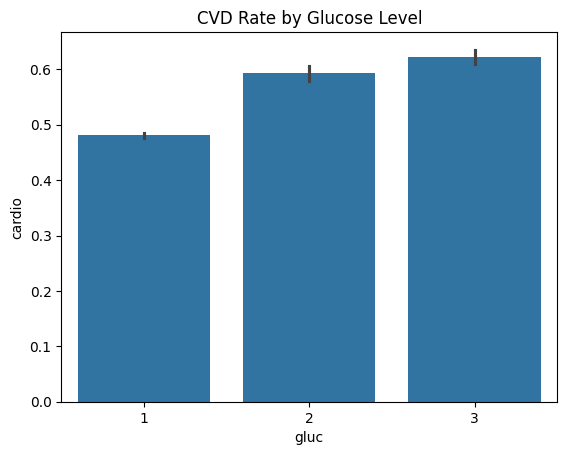

In [13]:
sns.barplot(x='gluc', y='cardio', data=df); plt.title("CVD Rate by Glucose Level")

Text(0.5, 1.0, 'Alcohol vs CVD')

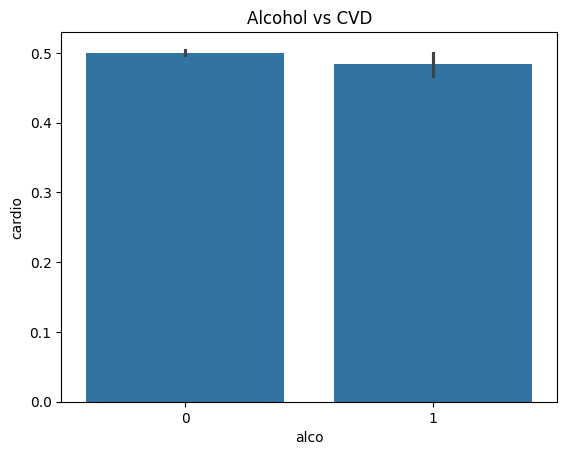

In [14]:
sns.barplot(x='alco', y='cardio', data=df); plt.title("Alcohol vs CVD")

Text(0.5, 1.0, 'Physical Activity vs CVD')

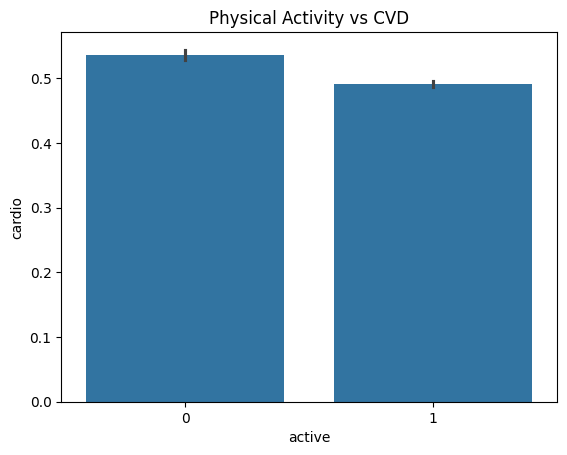

In [15]:
sns.barplot(x='active', y='cardio', data=df); plt.title("Physical Activity vs CVD")

Text(0.5, 1.0, 'Gender vs CVD')

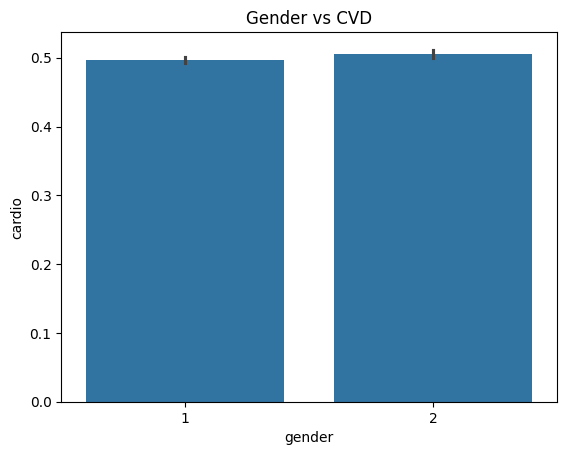

In [16]:
sns.barplot(x='gender', y='cardio', data=df); plt.title("Gender vs CVD")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

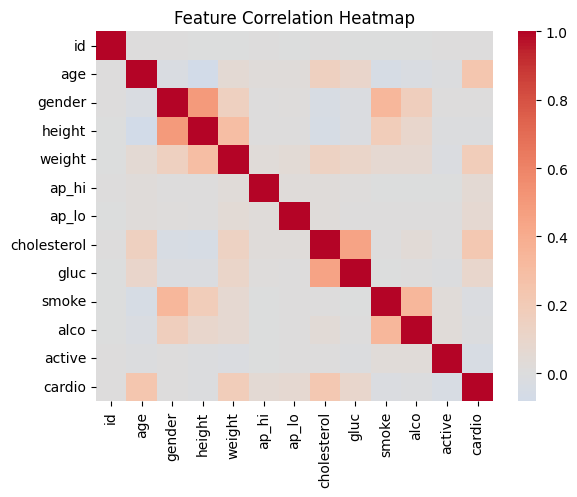

In [17]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")

In [18]:
df.to_csv("Cleaned Cardiovascular.csv", index=False)